## The New York Times Covid-19 Database

The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

These data have fueled many articles and graphics by The Times; these are updated regularly at
[https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html). 
The Times has created many visualizations that are effective communications of important information about the pandemic. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this illustration we will only use
the data aggregated at the state level. 

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
covid_table = Table.read_table("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips')
covid_table

date,state,cases,deaths
2020-01-21,Washington,1,0
2020-01-22,Washington,1,0
2020-01-23,Washington,1,0
2020-01-24,Illinois,1,0
2020-01-24,Washington,1,0
2020-01-25,California,1,0
2020-01-25,Illinois,1,0
2020-01-25,Washington,1,0
2020-01-26,Arizona,1,0
2020-01-26,California,2,0


### Process the recent data

Let's plot Covid-19 statistics for Connecticut. We could also only use data after a particular date. 

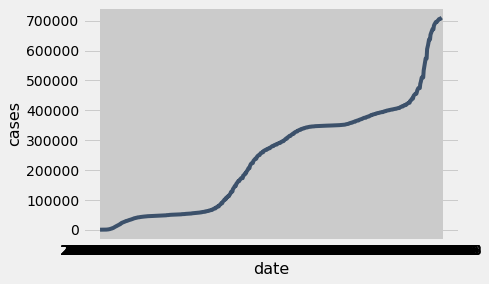

In [3]:
state = 'Connecticut'
start_date = '2020-03-08'   # computations can be made faseter if we look at only more recent dates '2021-10-01'
state_data = covid_table.where('state', state)
state_data = state_data.where('date', are.above(start_date))
state_data.plot("date", "cases")

In [4]:
# Let's look at new cases rather than the cumulative number of cases
# we can use the np.diff() function to get the number of new cases each day

num_new_cases = np.diff(state_data.column('cases'))
num_new_cases


array([    0,     1,     3,     5,     9,     6,    15,    27,    28,
          63,    35,    29,   104,    88,   203,   257,   137,   279,
         233,   469,   578,   557,   429,   267,  1091,   361,   399,
        1231,   875,  1000,  1003,   754,   972,   525,  1346,   608,
         766,  1129,   925,   741,   412,  1853,   545,  2109,   631,
         821,   661,   687,   728,   315,   455,   933,  1064,   523,
           0,   686,   648,   374,   789,   627,   573,   570,   211,
         568,   522,   609,   621,   618,   716,   697,   314,   587,
         191,   432,   382,   446,   405,   430,   -15,   271,   203,
         260,   179,   539,   239,   112,   148,   221,   358,   150,
         124,    87,   168,   114,   228,   305,    94,   147,   114,
          80,    11,   117,   158,    40,    27,   117,    14,    81,
          65,   147,    97,    59,   152,    58,    74,    71,     0,
           0,   259,    57,    75,   101,    78,     0,     0,   223,
          20,   106,

In [5]:
### Can we add new cases to our state_data Table? 
# state_data.with_column("new cases", num_new_cases)


In [6]:
# let's examine now many entries there are in new cases vs. the number of rows in the state_data table
print(len(num_new_cases))

state_data.num_rows

702


703

In [7]:
# let's add an extra 0 to make num_new_cases vector the same length as the number of rows in the state_data Table 

num_new_cases2 = np.insert(num_new_cases, 0, 0)

len(num_new_cases2)

703

In [8]:
state_data_with_new_cases = state_data.with_column("new cases", num_new_cases2)
state_data_with_new_cases

date,state,cases,deaths,new cases
2020-03-09,Connecticut,2,0,0
2020-03-10,Connecticut,2,0,0
2020-03-11,Connecticut,3,0,1
2020-03-12,Connecticut,6,0,3
2020-03-13,Connecticut,11,0,5
2020-03-14,Connecticut,20,0,9
2020-03-15,Connecticut,26,0,6
2020-03-16,Connecticut,41,0,15
2020-03-17,Connecticut,68,0,27
2020-03-18,Connecticut,96,1,28


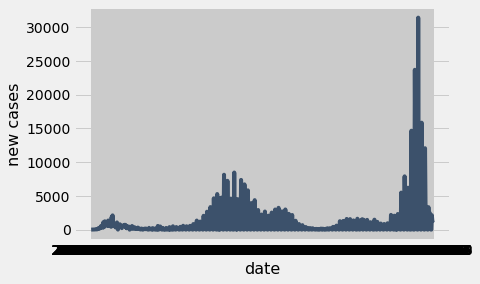

In [9]:
# create line plot treating date 
state_data_with_new_cases.plot("date", "new cases")
# state_data_with_new_cases.scatter('date', 'new cases')

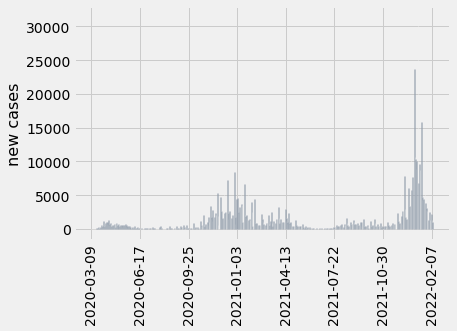

In [10]:
# visualizating data treating date as a categorical variable
state_data_with_new_cases.bar('date', 'new cases')
plots.xticks(rotation=90) 
plots.xlabel('');

Compare this to the graph here: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).

Now, your task is to modify the above code in order to display a plot of the new *deaths* each day. (Hint: You only need to change one word!) What stands out to you upon comparing the plots of new cases and new deaths? 


## Recent cases

Let's also look a recent cases using a scatter plot.


In [25]:
# let's add a variable "days back" which has the number of days ago each date is from today
state_data_days_back = state_data_with_new_cases.with_column('days back', np.arange(-1*len(state_data_with_new_cases['date']), 0))
state_data_days_back

date,state,cases,deaths,new cases,days back
2020-03-09,Connecticut,2,0,0,-703
2020-03-10,Connecticut,2,0,0,-702
2020-03-11,Connecticut,3,0,1,-701
2020-03-12,Connecticut,6,0,3,-700
2020-03-13,Connecticut,11,0,5,-699
2020-03-14,Connecticut,20,0,9,-698
2020-03-15,Connecticut,26,0,6,-697
2020-03-16,Connecticut,41,0,15,-696
2020-03-17,Connecticut,68,0,27,-695
2020-03-18,Connecticut,96,1,28,-694


In [28]:
# let's only look at recent data
recent_state_data = state_data_days_back.sort("days back", descending = True).take(np.arange(0, 30))
recent_state_data

date,state,cases,deaths,new cases,days back
2022-02-09,Connecticut,710669,10214,1048,-1
2022-02-08,Connecticut,709621,10158,1343,-2
2022-02-07,Connecticut,708278,10159,2138,-3
2022-02-06,Connecticut,706140,10159,0,-4
2022-02-05,Connecticut,706140,10159,0,-5
2022-02-04,Connecticut,706140,10159,1269,-6
2022-02-03,Connecticut,704871,10083,2445,-7
2022-02-02,Connecticut,702426,10083,1786,-8
2022-02-01,Connecticut,700640,10076,1240,-9
2022-01-31,Connecticut,699400,10010,3330,-10


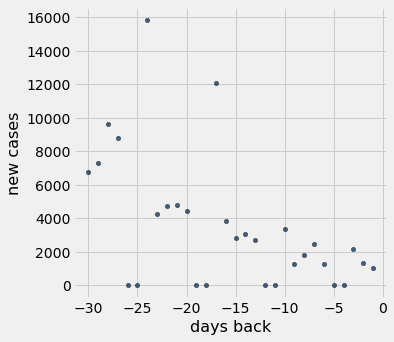

In [29]:
# let's create a scatter plot. Why are some values zero and some very large?  
recent_state_data.scatter("days back", "new cases")